<a href="https://colab.research.google.com/github/Janebhop/fraud-detection-course/blob/main/notebook/chapter2/Chapter_2_Datapreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation
reference original article by **Jason Brownlee**
<br>
[How to prepare data for machine learning](https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/)
<br>
[Improve Model Accuracy with Data Pre-Processing](https://machinelearningmastery.com/improve-model-accuracy-with-data-pre-processing/)

## Colab environment setting <a class="anchor" id="bullet-1"></a>

```
# Mount drive
```

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


```
# Install package
```

In [ ]:
## install pandas profiling
%%capture
!pip install -U pandas-profiling

```
# insert environment
```

In [1]:
import os,sys
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

## Data preparation Process <a class="anchor" id="bullet-2"></a>
เป็นการจัดการ data ให้ง่ายต่อการใช้งานอีกทั้งยังช่วยเพิ่มประสิทธิภาพในการทำ Machine Learning (ML) โดยปกติแล้วจะมี 3 ขั้นตอนดังนี้:
- **Step 1: Data Selection** เลือก data สำหรับใช้งาน รวมถึงการ Exploratory Data Analysis (EDA)
- **Step 2: Data Preprocessing** เป็นขั้นตอนในการกำหนด format data, กำจัด missing values 
- **Step 3: Data Transformation** ขั้นตอนนี้เป็นการแปลง attribute เพื่อใช้ในการทำ ML เช่น การ scaling, การทำ aggregation, การใช้ log หรือ exponential function เพื่อปรับ skewness เป็นต้น

In [3]:
import pandas as pd
filePath = '/content/drive/My Drive/paysimdata/PS_20174392719_1491204439457_log.csv'
fulldata = pd.read_csv(filePath)

## Data selection <a class="anchor" id="bullet-3"></a>
เลือก column เพื่อนำมาเป็น attribute 
- **EDA** เป็นการดูข้อมูลในมุมต่างๆเพื่อพิจารณาว่า ข้อมูลมีจำนวนเท่าใด ,ชนิดของข้อมูล, ความสัมพันธ์กัน, รวมถึงการกระจายตัว ในตัวอย่างมีการใช้ [pandas profiling](https://github.com/pandas-profiling/pandas-profiling) ซึ่งเป็น library บน python ที่ใช้ในการ EDA ในมุมมองต่างๆแบบพื้นฐาน

In [6]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
from pandas_profiling import ProfileReport
fulldata.profile_report()

In [7]:
fulldata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Preprocessing 

เป็นขั้นตอนการดำเนินการกับข้อมูลเพื่อให้พร้อมใช้สำหรับทำ ML เป็นสิ่งจำเป็นมากสำหรับ model ที่ไม่สามารถดำเนินการกับ attribute ที่ซับซ้อนได้ ดังนั้น การกำหนดข้อมูลเพื่อง่ายต่อการนำไปใช้งานจึงมีความสำคัญในการเพิ่มประสิทธิภาพของ model
- **Missing Data:** บางชุดข้อมูลเป็นข้อมูลที่ไม่สมบูรณ์อาจเกิดจากการจัดเก็บ หรือ เกิดในขั้นตอนนำข้อมูลออกมาใช้งาน ซึ่งอาจมีข้อมูลบางส่วนสูญหายและไม่สามารถใช้งานได้
- **Cleaning:** การจัดการกับ missing value เพื่อให้ใช้งานได้มีหลายวิธี เช่น การนำออกจาก dataset หรือการทำ Imputation เพื่อซ่อม missing value ทั้งนี้การดำเนินการส่วนนี้ขึ้นอยู่กับริบทในการทำ model <br>`หมายเหตุ : ข้อมูลชุดนี้ไม่มี missing value`
- **Dummy Attributes:** เป็นการดำเนินการกับข้อมูลที่เป็น category data โดยจะแบ่งแต่ละ group เป็น attribute ใหม่ที่บอกว่า ใช่หรือไม่ใช่

In [45]:
type_dummy = pd.get_dummies(fulldata['type'], prefix='type')

In [46]:
type_dummy

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


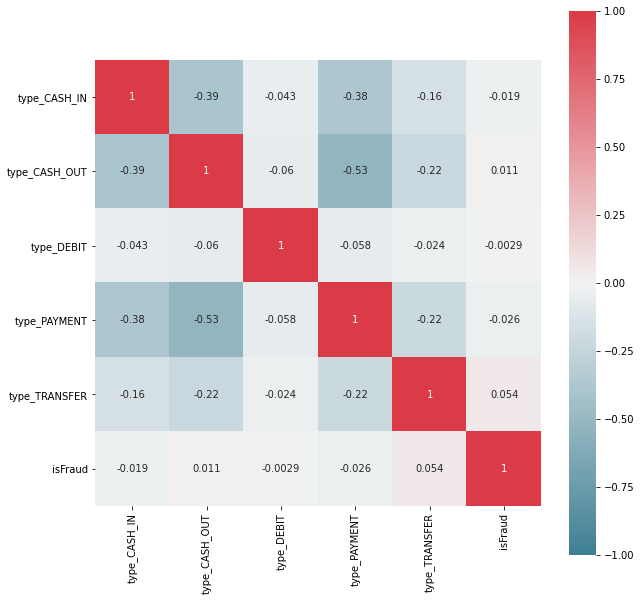

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
data_plot = pd.concat([type_dummy, fulldata['isFraud']], axis=1, sort=False)
corr = data_plot.corr()
sns.heatmap(corr,vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

## Data Transformation 
เป็นขั้นตอนในการแปลง data ก่อนเลือกใช้ algorithm สำหรับสร้าง model ML สำหรับเรียนรู้ข้อมูล อาจมีการปรับค่าต่างๆให้อยู่ในช่วงเดียวกัน หรือ หรือการทำพวก feature engineering เพื่อสร้าง attribute ใหม่ให้มีความสัมพันธ์กับ Label มากขึ้น

- **Capturing Feature Relationships:** เป็นการดำเนินการระหว่าง attribute เพื่อให้ได้ feature ใหม่ที่อาจเพิ่มประสิทธิภาพในการทำ model เช่นการ aggregate data หรือ การคำนวณค่าต่างๆระหว่าง attribute

In [48]:
## stripPlot function
def plotStrip(y_name,x_list,data):
    plt.rcParams['figure.figsize'] = [10,10]
    n_attribute = len(x_list)
    nrow = 2
    ncol = np.ceil(n_attribute/nrow)
    ncol = np.where(ncol<2,2,ncol)
    fig, ax = plt.subplots(int(nrow), int(ncol))
    i=0
    for row in ax:
      for col in row:
          if i >= n_attribute:
            break
          sns.stripplot(ax=col,x=y_name,y=x_list[i],data=data)
          col.set_title(x_list[i], fontsize=10,color='black')
          i +=1
    plt.show()

In [33]:
columnlist = ['amount',
            'oldbalanceOrg',
            'newbalanceOrig',
            'oldbalanceDest',
            'newbalanceDest']

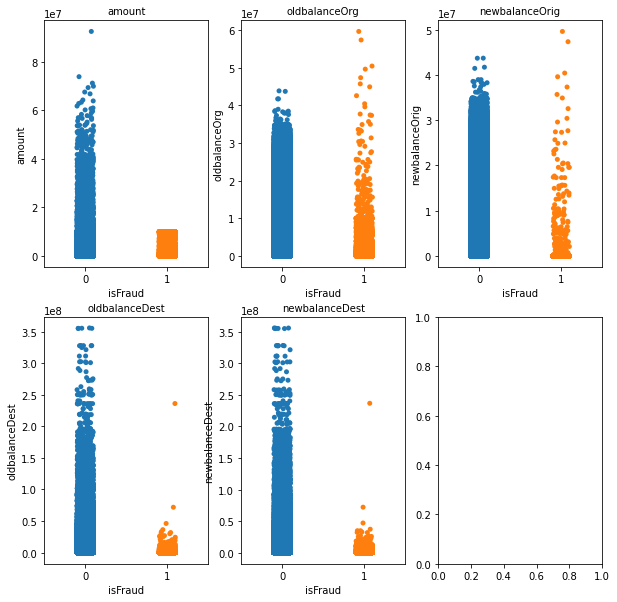

In [34]:
plotStrip('isFraud',columnlist,fulldata)

In [35]:
# หาค่า error ระหว่างค่า balance
fulldata['errorBalanceOrig'] = fulldata['newbalanceOrig'] + fulldata['amount'] - fulldata['oldbalanceOrg']
fulldata['errorBalanceDest'] = fulldata['oldbalanceDest'] + fulldata['amount'] - fulldata['newbalanceDest']

In [36]:
capturelist = ['errorBalanceOrig','errorBalanceDest']

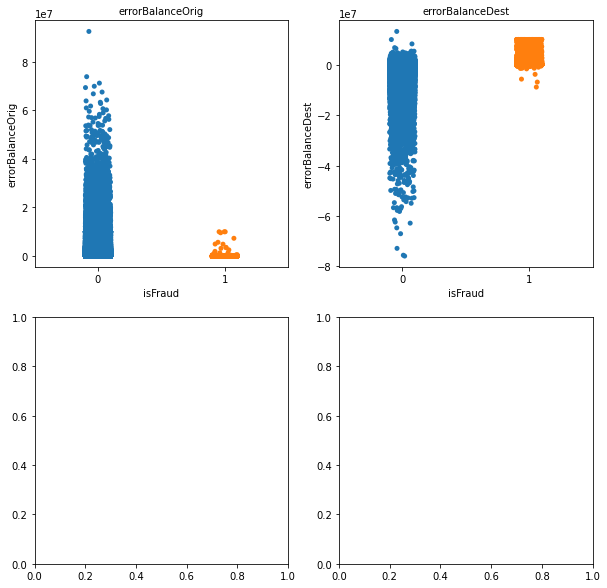

In [37]:
plotStrip('isFraud',capturelist,fulldata)

- **Scaling:** การปรับ data ให้อยู่ในช่วงเดียวกันเช่นการทำ normalization ให้อยู่ในช่วง [0,1] หรือ standardization ให้อยู่ในช่วง [-1,1] เป็นต้น

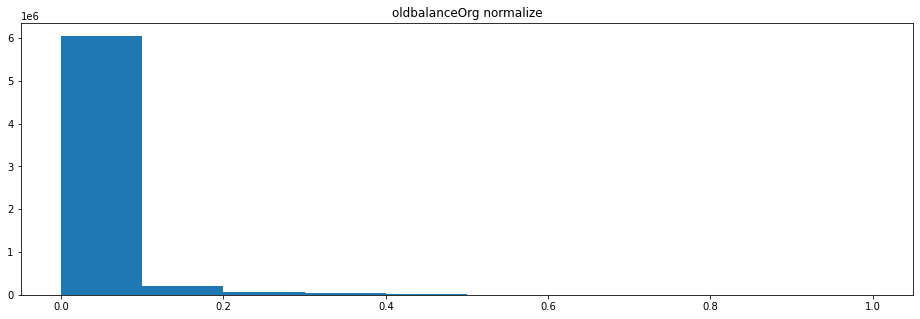

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fulldata['oldbalanceOrgNor'] = scaler.fit_transform(fulldata[['oldbalanceOrg']])

figure = plt.figure(figsize=(16, 5))
plt.hist(fulldata['oldbalanceOrgNor'])
plt.title("oldbalanceOrg normalize")
plt.show()

In [39]:
fulldata['newbalanceOrigNor'] = scaler.fit_transform(fulldata[['newbalanceOrig']])
fulldata['oldbalanceDestNor'] = scaler.fit_transform(fulldata[['oldbalanceDest']])
fulldata['newbalanceDestNor'] = scaler.fit_transform(fulldata[['newbalanceDest']])
fulldata['errorBalanceOrigNor'] = scaler.fit_transform(fulldata[['errorBalanceOrig']])
fulldata['errorBalanceDestNor'] = scaler.fit_transform(fulldata[['errorBalanceDest']])

In [50]:
selectAttribute = ['isFraud',
                   'oldbalanceOrgNor',
                   'newbalanceOrigNor',
                   'oldbalanceDestNor',
                   'newbalanceDestNor',
                   'errorBalanceOrigNor',
                   'errorBalanceDestNor']

In [51]:
data = fulldata[selectAttribute]

In [52]:
data = pd.concat([data,type_dummy],axis=1,sort=False)

In [53]:
data.head()

,isFraud,oldbalanceOrgNor,newbalanceOrigNor,oldbalanceDestNor,newbalanceDestNor,errorBalanceOrigNor,errorBalanceDestNor,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0.002855,0.003233,0.000000,0.0,1.081718e-10,0.852022,0,0,0,1,0
1,0,0.000357,0.000391,0.000000,0.0,1.081718e-10,0.851933,0,0,0,1,0
2,1,0.000003,0.000000,0.000000,0.0,1.081718e-10,0.851914,0,0,0,0,1
3,1,0.000003,0.000000,0.000059,0.0,1.081718e-10,0.852152,0,1,0,0,0
4,0,0.000697,0.000603,0.000000,0.0,1.081718e-10,0.852043,0,0,0,1,0


## Modeling

In [55]:
# splitting data
import numpy as np
# fraud and no fraud transactions are separated by 'isFraud' column
dataF = data[data['isFraud'] == 1]
dataNF = data[data['isFraud'] == 0]

# split fraud transaction into 80 percent and 20 percent sessions
mskF = np.random.rand(len(dataF)) < 0.8
trainF = dataF[mskF]
testF = dataF[~mskF]

# split no fraud transaction into 80 percent and 20 percent sessions
mskNF = np.random.rand(len(dataNF)) < 0.8
trainNF = dataNF[mskNF]
testNF = dataNF[~mskNF]

# 
train_data = pd.concat([trainF,trainNF]).reset_index(drop = True)
test_data = pd.concat([testF,testNF]).reset_index(drop = True)

#create input data attributes by dropped irrevalent and target column 
train_feature = train_data.drop(['isFraud'],axis = 1)
test_feature = test_data.drop(['isFraud'],axis = 1)

train_label = train_data['isFraud']
test_label = test_data['isFraud']

In [56]:
train_feature.head()

,oldbalanceOrgNor,newbalanceOrigNor,oldbalanceDestNor,newbalanceDestNor,errorBalanceOrigNor,errorBalanceDestNor,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.000003,0.0,0.000000,0.000000,1.081718e-10,0.851914,0,0,0,0,1
1,0.000003,0.0,0.000059,0.000000,1.081718e-10,0.852152,0,1,0,0,0
2,0.000047,0.0,0.000000,0.000000,1.081718e-10,0.851943,0,0,0,0,1
3,0.000047,0.0,0.000074,0.000000,1.081718e-10,0.852238,0,1,0,0,0
4,0.000338,0.0,0.000018,0.000034,1.081718e-10,0.852072,0,1,0,0,0


In [57]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(train_feature,train_label)

# predict train data
lr_predY_train = clf.predict(train_feature)
lr_predY = clf.predict(test_feature)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,classification_report

accuracy_scorelr = accuracy_score(test_label,lr_predY)
precision_scorelr = precision_score(test_label,lr_predY,average="binary",pos_label=1)
recall_scorelr = recall_score(test_label,lr_predY,average="binary",pos_label=1)
f1_scorelr = f1_score(test_label, lr_predY, average='macro')

print("Accuracy_score : ",accuracy_scorelr)
print("Precision_score : ",precision_scorelr)
print("Recall_score : ",recall_scorelr)
print("F1_score : ",f1_scorelr)

Accuracy_score :  0.9988221196666779
Precision_score :  0.9629629629629629
Recall_score :  0.09448818897637795
F1_score :  0.5857505491962426


In [59]:
cm_lr = classification_report(test_label,lr_predY)
print(cm_lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272672
           1       0.96      0.09      0.17      1651

    accuracy                           1.00   1274323
   macro avg       0.98      0.55      0.59   1274323
weighted avg       1.00      1.00      1.00   1274323



In [60]:
cm_lr = confusion_matrix(test_label,lr_predY)
print(cm_lr)

[[1272666       6]
 [   1495     156]]


In [ ]:
from xgboost.sklearn import XGBClassifier
xgbc = XGBClassifier()

# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
#        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
#        n_estimators=100, n_jobs=1, nthread=None,
#        objective='multi:softprob', random_state=0, reg_alpha=0,
#        reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
#        subsample=1, verbosity=1) 

xgbc.fit(train_feature, train_label)

# predict train data
xgb_predY_train = xgbc.predict(train_feature)
xgb_predY = xgbc.predict(test_feature)


In [ ]:
cm_xg = classification_report(test_label,xgb_predY)
print(cm_xg)

In [ ]:
cm_xg = confusion_matrix(test_label,xgb_predY)
print(cm_xg)